In [10]:
import pickle
import matplotlib.pyplot as plt

# Load the pickle file
with open('/home/ubuntu/workspace/dataset/DANC/multi_mnist.pickle', 'rb') as f:
    data = pickle.load(f)
# Assuming the data is a dictionary with 'images' and 'labels' keys
images = data[0]
labels = data[1]
print('images_shape = ', images.shape)
print('labels_shape = ', labels.shape)
def plot_multi_mnist_images(images, labels, num_images=10):
    """ Plot Multi-MNIST images """
    plt.figure(figsize=(2, 5))
    for i in range(num_images):
        plt.subplot(2, num_images/2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"{labels[i]}")
        plt.axis('off')
    plt.show()

# Plot some initial images with labels
plot_multi_mnist_images(images, labels, num_images=10)


images_shape =  (120000, 36, 36)
labels_shape =  (120000, 2)


In [1]:
"""
CUDA_VISIBLE_DEVICES=3 python train.py
"""

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Thu_Jun_11_22:26:38_PDT_2020
Cuda compilation tools, release 11.0, V11.0.194
Build cuda_11.0_bu.TC445_37.28540450_0


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Định nghĩa mô hình đơn giản
class SimpleModel(nn.Module):
    def __init__(self, initial_value):
        super(SimpleModel, self).__init__()
        self.x = nn.Parameter(torch.tensor(initial_value, dtype=torch.float32))

    def forward(self):
        return self.x**3

# Khởi tạo mô hình và optimizer
model = SimpleModel(1.0)  # Khởi tạo với x = 1.0
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Bước 1: Tính đạo hàm của x^3 và cập nhật tham số x
optimizer.zero_grad()
output = model()
loss = output  # x^3
print('Loss (x^3):', loss.item())
loss.backward(retain_graph=True)  # Giữ lại đồ thị tính toán
optimizer.step()

print('x after step 1:', model.x.item())

# Bước 2: Đổi hàm thành -x^3/2 và tính đạo hàm, sau đó cập nhật tham số x
optimizer.zero_grad()
output = model()
new_loss = -output / 2  # -x^3 / 2
print('New Loss (-x^3/2):', new_loss.item())
new_loss.backward()  # Không cần giữ lại đồ thị tính toán
optimizer.step()

print('x after step 2:', model.x.item())


Loss (x^3): 1.0
x after step 1: 0.9700000286102295
New Loss (-x^3/2): -0.45633652806282043
x after step 2: 0.9841135144233704


In [ ]:

{
    "optimizer": "Adam", 
    "batch_size": 256,
    "lr": 0.0005,
    "dataset": "celeba",
    "tasks": ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20",
                  "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39"],
    "normalization_type": "loss+",
    "algorithm": "mgda",
    "use_approximation": true,
    "scales": {"0":0.025, "1":0.025, "2":0.025, "3":0.025, "4":0.025, "5":0.025, "6":0.025, "7":0.025, "8":0.025, "9":0.025, "10":0.025, 
               "11":0.025, "12":0.025, "13":0.025, "14":0.025, "15":0.025, "16":0.025, "17":0.025, "18":0.025, "19":0.025, "20":0.025, 
               "21":0.025, "22":0.025, "23":0.025, "24":0.025, "25":0.025, "26":0.025, "27":0.025, "28":0.025, "29":0.025, "30":0.025, 
               "31":0.025, "32":0.025, "33":0.025, "34":0.025, "35":0.025, "36":0.025, "37":0.025, "38":0.025, "39":0.025},
    "parallel": true
}


In [ ]:

with open('configs.json') as config_params:
        configs = json.load(config_params)

with open(param_file) as json_params:
        params = json.load(json_params)

In [ ]:
for p in model.parameters():
                if p.requires_grad is False:
                    continue     
                dp = p.grad
                norm_acc = 0
                for p in model.parameters():
                    norm_acc = torch.matmul(dp_clone.flatten(), dp_clone.flatten())
                if dp is not None:                         
                    task_loss = model(X, ts)
                    # print('task_loss = ', task_loss)
                    dp_clone = dp.clone()
                    p.data = p.data - eps * dp_clone
                    task_loss_after = model(X, ts)
                    # print('task_loss_after =', task_loss_after)
                    
                    # print('norm_acc = ', norm_acc)
                    # time.sleep(10)
                    kappa = 1
                    while (max(task_loss_after[0], task_loss_after[1]) > max(task_loss[0], task_loss[1]) - eps * kappa * norm_acc):
                        kappa = kappa/2
                        # print('kappa = ', kappa)
                        # time.sleep(5)
                        p.data = p.data + kappa * eps * dp_clone # bug
                        task_loss_after = model(X, ts)          
                        if kappa < 1e-15:
                            # print('break')
                            break
                    # print('max_after = ', max(task_loss_after[0], task_loss_after[1]))
                    # print('max_init = ', max(task_loss[0], task_loss[1]))

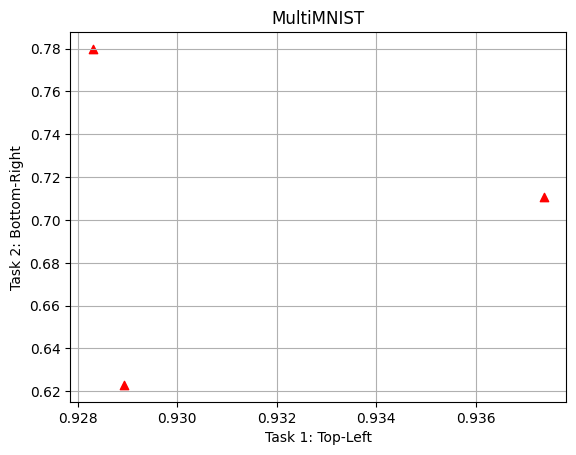

In [6]:
import matplotlib.pyplot as plt

# Data (replace with your own data)
x = [0.928925, 0.93736667, 0.9283]
y = [0.62299167, 0.71058333, 0.77984167]

# Create the scatter plot
plt.scatter(x, y, marker='^', color='r')

# Add labels and title
plt.xlabel("Task 1: Top-Left")
plt.ylabel("Task 2: Bottom-Right")
plt.title("MultiMNIST")

# Add grid
plt.grid(True)

# Show the plot
plt.show()


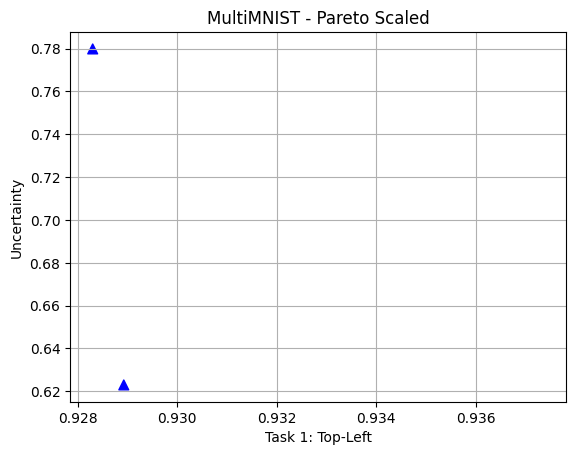

In [13]:
import matplotlib.pyplot as plt

# Data (replace with your own data)
# x = [0.83, 0.85, 0.87, 0.89, 0.91]
# y = [0.8, 0.82, 0.83, 0.85, 0.87]
# Data (replace with your own data)
x = [0.928925, 0.93736667, 0.9283]
y = [0.62299167, 0.71058333, 0.77984167]


# Normalize data (0-1 range)
# print(x - min(x))
x_norm = ([(x[i] - min(x))/ (max(x) - min(x)) for i in range (len(x))]) 
y_norm = ([(y[i] - min(y))/ (max(y) - min(y)) for i in range (len(y))]) 

# Pareto dominance calculation
def is_dominated(point_i, points):
  for point_j in points:
    if point_j != point_i and (x_norm[point_j] >= x_norm[point_i] and (x_norm[point_j] > x_norm[point_i] or y_norm[point_j] > y_norm[point_i])):
      return True
  return False

distances = []
for i in range(len(x)):
  if not is_dominated(i, range(len(x))):
    distances.append(float('inf'))  # Non-dominated points have infinite distance
  else:
    min_distance = float('inf')
    for j in range(len(x)):
      if i != j and is_dominated(j, range(len(x))):
        distance = ((x_norm[i] - x_norm[j])**2 + (y_norm[i] - y_norm[j])**2)**0.5  # Euclidean distance
        min_distance = min(min_distance, distance)
    distances.append(min_distance)

# Marker size scaling (adjust scaling factor as needed)
marker_sizes = [100 / (d + 1) for d in distances]  # Logarithmic scaling for emphasis

# Create the scatter plot with triangle marker
plt.scatter(x, y, marker='^', s=marker_sizes, c='blue')  # Adjust 'c' for color

# Add labels and title
plt.xlabel("Task 1: Top-Left")
plt.ylabel("Uncertainty")
plt.title("MultiMNIST - Pareto Scaled")

# Add grid
plt.grid(True)

# Show the plot
plt.show()